In [3]:
import numpy as np

# Dataset generation

In [4]:
#GENERATE THE POINTS FOR UNDERSTANDING DECISION REGION

p1 = np.linspace(-3,6,50)
p2 = np.linspace(-3,6,50)
pr = []
for i in p1:
    for j in p2:
        pr.append([i,j])
pr = np.array(pr)

# Bayes Classifier, Case 1

In [5]:
#parameter initialization

pw1 = 0.5
pw2 = 0.5
mu1 = np.array([3,3])
mu2 = np.array([0,0])
sigma = 0.5
dim = 2
n_samples = 100
I = np.eye(2, dtype=int)

In [6]:
# Creating scatter points for two classes

x1 = np.random.multivariate_normal(mu1, sigma*I, n_samples)
x2 = np.random.multivariate_normal(mu2, sigma*I, n_samples)
y1 = np.array([0]*n_samples)
y2 = np.array([1]*n_samples)
x = np.vstack((x1,x2))
y_true = np.hstack((y1,y2))

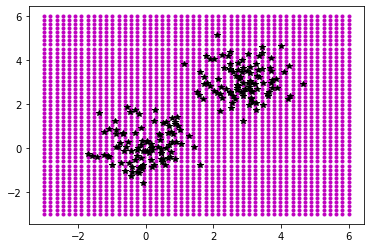

In [7]:
import matplotlib.pyplot as plt
  
plt.plot(pr[:,0], pr[:,1],'.m')
plt.plot(x1[:,0], x1[:,1],'*k')
plt.plot(x2[:,0], x2[:,1],'*k')
plt.show()

In [8]:
# constant calculation
def parameter_calculate_case1(mu1,mu2,sigma, pw1,pw2):
    w = mu1-mu2
    x0 = 0.5*(mu1+mu2)-(sigma*sigma/np.linalg.norm(mu1-mu2))*(pw1/pw2)*(mu1-mu2)
    return w,x0

# classifier
def classify_case1(w,x0,x):
    return np.dot(w,(x-x0))


In [9]:
w, x0 = parameter_calculate_case1(mu1,mu2,sigma, pw1,pw2)

# Classify points in Decision region
y_dr = []
for p in pr:
    temp = classify_case1(w,x0,p)
    if temp>0:
        y_dr.append(0)
    else:
        y_dr.append(1)
        
#Classify points in blobs
y_pred = []
for xi in x:
    temp = classify_case1(w,x0,xi)
    if temp>0:
        y_pred.append(0)
    else:
        y_pred.append(1)

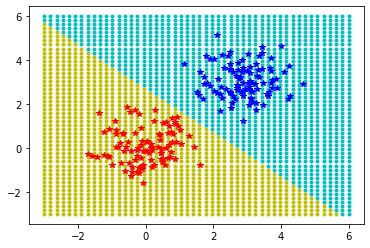

Accuracy: 1.0


In [10]:
# Classification result visualization
for i,p in enumerate(pr):
    if y_dr[i]==1:
        plt.plot(p[0], p[1],'.y')
    else:
        plt.plot(p[0], p[1],'.c')

for i,xi in enumerate(x):
    if y_pred[i]==1:
        plt.plot(xi[0], xi[1],'*r')
    else:
        plt.plot(xi[0], xi[1],'*b')
plt.show()

print("Accuracy: "+str(sum(y_true==y_pred)/len(y_pred)))

# Bayes Classifier: Case 2

In [11]:
#parameter initialization

pw1 = 0.5
pw2 = 0.5
mu1 = np.array([3,3])
mu2 = np.array([0,0])
cov_mat = np.array([[0.6,0.4],[0.4,0.6]])
n_samples = 100

In [12]:
# Creating scatter points for two classes

x1 = np.random.multivariate_normal(mu1, cov_mat, n_samples)
x2 = np.random.multivariate_normal(mu2, cov_mat, n_samples)
y1 = np.array([0]*n_samples)
y2 = np.array([1]*n_samples)
x = np.vstack((x1,x2))
y_true = np.hstack((y1,y2))

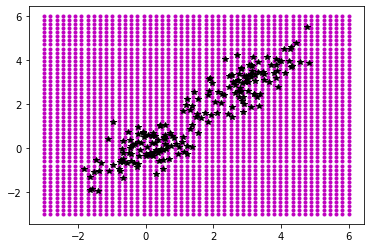

In [13]:
import matplotlib.pyplot as plt
  
plt.plot(pr[:,0], pr[:,1],'.m')
plt.plot(x1[:,0], x1[:,1],'*k')
plt.plot(x2[:,0], x2[:,1],'*k')
plt.show()

In [14]:
# constant calculation
def parameter_calculate_case2(mu1,mu2,cov_mat, pw1,pw2):
    w = np.matmul(np.linalg.inv(cov_mat),(mu1-mu2))
    x0 = 0.5*(mu1+mu2)-np.log(pw1/pw2)*(mu1-mu2)/(np.matmul(np.matmul(mu1-mu2,np.linalg.inv(cov_mat)),(mu1-mu2)))
    return w,x0

# classifier
def classify_case2(w,x0,x):
    return np.dot(w,(x-x0))


In [15]:
w,x0 = parameter_calculate_case2(mu1,mu2,cov_mat, pw1,pw2)
# Classify points in Decision region
y_dr = []
for p in pr:
    temp = classify_case2(w,x0,p)
    if temp>0:
        y_dr.append(0)
    else:
        y_dr.append(1)
        
#Classify points in blobs
y_pred = []
for xi in x:
    temp = classify_case2(w,x0,xi)
    if temp>0:
        y_pred.append(0)
    else:
        y_pred.append(1)

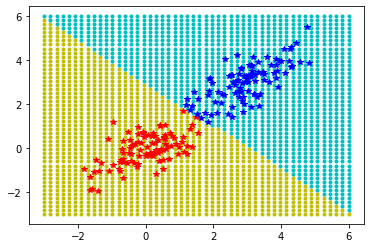

Accuracy: 0.98


In [16]:
# Classification result visualization
for i,p in enumerate(pr):
    if y_dr[i]==1:
        plt.plot(p[0], p[1],'.y')
    else:
        plt.plot(p[0], p[1],'.c')

for i,xi in enumerate(x):
    if y_pred[i]==1:
        plt.plot(xi[0], xi[1],'*r')
    else:
        plt.plot(xi[0], xi[1],'*b')
plt.show()

print("Accuracy: "+str(sum(y_true==y_pred)/len(y_pred)))

# Bayes Classifier: Case 3

In [17]:
#parameter initialization

pw1 = 0.5
pw2 = 0.5
mu1 = np.array([3,3])
mu2 = np.array([0,0])
cov_mat1 = np.array([[0.6,0.4],[0.4,0.6]])
cov_mat2 = np.array([[1,0],[0,1]])
n_samples = 100

In [18]:
# Creating scatter points for two classes

x1 = np.random.multivariate_normal(mu1, cov_mat1, n_samples)
x2 = np.random.multivariate_normal(mu2, cov_mat2, n_samples)
y1 = np.array([0]*n_samples)
y2 = np.array([1]*n_samples)
x = np.vstack((x1,x2))
y_true = np.hstack((y1,y2))

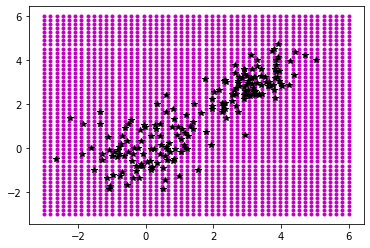

In [19]:
import matplotlib.pyplot as plt
  
plt.plot(pr[:,0], pr[:,1],'.m')
plt.plot(x1[:,0], x1[:,1],'*k')
plt.plot(x2[:,0], x2[:,1],'*k')
plt.show()

In [20]:
# constant calculation
def parameter_calculate_case3(mu1,mu2,cov_mat1, cov_mat2, pw1,pw2):
    W1 = -0.5*np.linalg.inv(cov_mat1)
    w1 = np.matmul(np.linalg.inv(cov_mat1),mu1)
    x10 = -0.5*np.matmul(np.matmul(mu1,np.linalg.inv(cov_mat1)),(mu1))-0.5*np.log(np.linalg.det(cov_mat1))+np.log(pw1)
    W2 = -0.5*np.linalg.inv(cov_mat2)
    w2 = np.matmul(np.linalg.inv(cov_mat2),mu2)
    x20 = -0.5*np.matmul(np.matmul(mu2,np.linalg.inv(cov_mat2)),(mu2))-0.5*np.log(np.linalg.det(cov_mat2))+np.log(pw2)
    return W1,w1,x10,W2,w2,x20

# classifier
def classify_case3(W1,w1,x10,W2,w2,x20,x):
    g1 = np.matmul(np.matmul(x,W1),x)+np.matmul(w1,x)+x10
    g2 = np.matmul(np.matmul(x,W2),x)+np.matmul(w2,x)+x20
    return g1-g2



In [21]:
W1,w1,x10,W2,w2,x20 = parameter_calculate_case3(mu1,mu2,cov_mat1, cov_mat2, pw1,pw2)
# Classify points in Decision region
y_dr = []
for p in pr:
    if classify_case3(W1,w1,x10,W2,w2,x20,p)>0:
        y_dr.append(0)
    else:
        y_dr.append(1)
        
#Classify points in blobs
y_pred = []
for xi in x:
    if classify_case3(W1,w1,x10,W2,w2,x20,xi)>0:
        y_pred.append(0)
    else:
        y_pred.append(1)

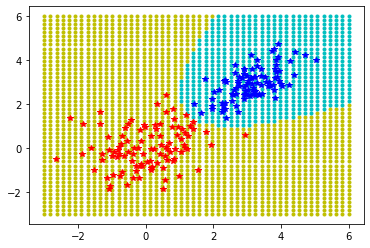

Accuracy: 0.995


In [22]:
# Classification result visualization
for i,p in enumerate(pr):
    if y_dr[i]==1:
        plt.plot(p[0], p[1],'.y')
    else:
        plt.plot(p[0], p[1],'.c')

for i,xi in enumerate(x):
    if y_pred[i]==1:
        plt.plot(xi[0], xi[1],'*r')
    else:
        plt.plot(xi[0], xi[1],'*b')
plt.show()

print("Accuracy: "+str(sum(y_true==y_pred)/len(y_pred)))

# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x, y_true)
y_dr = clf.predict(pr)

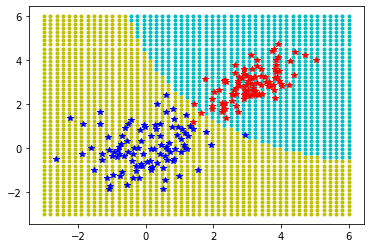

In [24]:
# Classification result visualization
for i,p in enumerate(pr):
    if y_dr[i]==1:
        plt.plot(p[0], p[1],'.y')
    else:
        plt.plot(p[0], p[1],'.c')

plt.plot(x1[:,0], x1[:,1],'*r')
plt.plot(x2[:,0], x2[:,1],'*b')
plt.show()


# Bias Variance Tradeoff

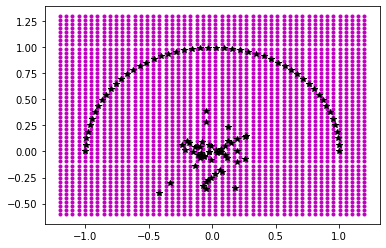

In [26]:
# Genarate Moon+blob data

import sklearn
from sklearn import datasets
n_samples = 100
x,y = datasets.make_moons(n_samples=n_samples, shuffle=False, noise=None, random_state=None)
x1 = x[0:int(n_samples/2)]
y1 = y[0:int(n_samples/2)]
x2 = np.random.multivariate_normal([0,0], [[0.03,0],[0,0.03]], int(n_samples/2))
y2 = np.array([1]*int(n_samples/2))
x = np.vstack((x1,x2))
y = np.hstack((y1,y2))
y_true = y


#GENERATE THE POINTS FOR UNDERSTANDING DECISION REGION

p1 = np.linspace(-1.2,1.2,50)
p2 = np.linspace(-0.6,1.3,50)
pr = []
for i in p1:
    for j in p2:
        pr.append([i,j])
pr = np.array(pr)

plt.plot(pr[:,0], pr[:,1],'.m')
plt.plot(x1[:,0], x1[:,1],'*k')
plt.plot(x2[:,0], x2[:,1],'*k')
plt.show()

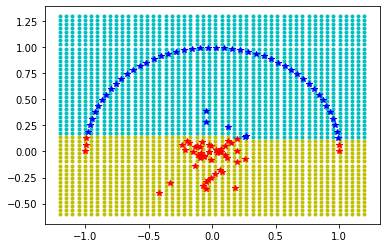

Accuracy: 0.9


In [27]:
#Bayes Classifier Case 1
pw1 = 0.5
pw2 = 0.5
mu1 = np.mean(x1, axis=0)
mu2 = np.mean(x2, axis=0)
sigma = 0.5*(np.std(x1)+np.std(x2))


w, x0 = parameter_calculate_case1(mu1,mu2,sigma, pw1,pw2)

#Classify points in blobs
y_pred = []
for xi in x:
    temp = classify_case1(w,x0,xi)
    if temp>0:
        y_pred.append(0)
    else:
        y_pred.append(1)
y_pred_m1 = y_pred
#Classify points in DR
y_dr = []
for p in pr:
    temp = classify_case1(w,x0,p)
    if temp>0:
        y_dr.append(0)
    else:
        y_dr.append(1)

#Plot and Visualization
for i,p in enumerate(pr):
    if y_dr[i]==1:
        plt.plot(p[0], p[1],'.y')
    else:
        plt.plot(p[0], p[1],'.c')        
for i,xi in enumerate(x):
    if y_pred[i]==1:
        plt.plot(xi[0], xi[1],'*r')
    else:
        plt.plot(xi[0], xi[1],'*b')
plt.show()

print("Accuracy: "+str(sum(y_true==y_pred)/len(y_pred)))

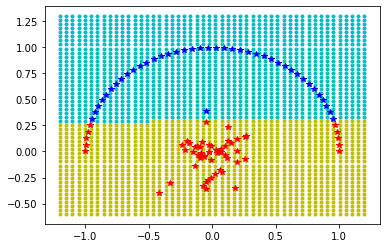

Accuracy: 0.89


In [28]:
#Bayes Classifier Case 2
pw1 = 0.5
pw2 = 0.5
mu1 = np.mean(x1, axis=0)
mu2 = np.mean(x2, axis=0)
cov_mat1 = np.cov(x1.T)
cov_mat2 = np.cov(x2.T)
cov_mat = 0.5*(cov_mat1+cov_mat2)


w, x0 = parameter_calculate_case2(mu1,mu2,cov_mat, pw1,pw2)

#Classify points in blobs
y_pred = []
for xi in x:
    temp = classify_case2(w,x0,xi)
    if temp>0:
        y_pred.append(0)
    else:
        y_pred.append(1)
y_pred_m2 = y_pred
#Classify points in DR
y_dr = []
for p in pr:
    temp = classify_case2(w,x0,p)
    if temp>0:
        y_dr.append(0)
    else:
        y_dr.append(1)

#Plot and Visualization
for i,p in enumerate(pr):
    if y_dr[i]==1:
        plt.plot(p[0], p[1],'.y')
    else:
        plt.plot(p[0], p[1],'.c')        
for i,xi in enumerate(x):
    if y_pred[i]==1:
        plt.plot(xi[0], xi[1],'*r')
    else:
        plt.plot(xi[0], xi[1],'*b')
plt.show()

print("Accuracy: "+str(sum(y_true==y_pred)/len(y_pred)))

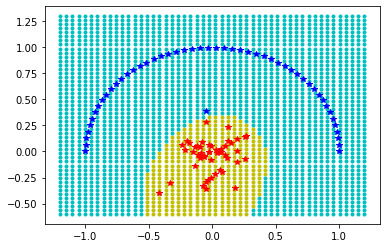

Accuracy: 0.99


In [29]:
#Bayes Classifier Case 3
pw1 = 0.5
pw2 = 0.5
mu1 = np.mean(x1, axis=0)
mu2 = np.mean(x2, axis=0)
cov_mat1 = np.cov(x1.T)
cov_mat2 = np.cov(x2.T)

W1,w1,x10,W2,w2,x20 = parameter_calculate_case3(mu1,mu2,cov_mat1, cov_mat2, pw1,pw2)
#Classify points in blobs
y_pred = []
for xi in x:
    if classify_case3(W1,w1,x10,W2,w2,x20,xi)>0:
        y_pred.append(0)
    else:
        y_pred.append(1)
y_pred_m3 = y_pred
# Classify points in Decision region
y_dr = []
for p in pr:
    if classify_case3(W1,w1,x10,W2,w2,x20,p)>0:
        y_dr.append(0)
    else:
        y_dr.append(1)

# Classification result visualization
for i,p in enumerate(pr):
    if y_dr[i]==1:
        plt.plot(p[0], p[1],'.y')
    else:
        plt.plot(p[0], p[1],'.c')        
for i,xi in enumerate(x):
    if y_pred[i]==1:
        plt.plot(xi[0], xi[1],'*r')
    else:
        plt.plot(xi[0], xi[1],'*b')
plt.show()

print("Accuracy: "+str(sum(y_true==y_pred)/len(y_pred)))

# McNemar Test

In [32]:
# Example of calculating the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

# build contingency table
y_pred_m1_correct = y_pred_m1==y_true
y_pred_m2_correct = y_pred_m2==y_true
c11 = sum([1 for i in range(len(y_pred_m1_correct)) if y_pred_m1_correct[i]==True and y_pred_m2_correct[i]==True])
c10 = sum([1 for i in range(len(y_pred_m1_correct)) if y_pred_m1_correct[i]==True and y_pred_m2_correct[i]==False])
c01 = sum([1 for i in range(len(y_pred_m1_correct)) if y_pred_m1_correct[i]==False and y_pred_m2_correct[i]==True])
c00 = sum([1 for i in range(len(y_pred_m1_correct)) if y_pred_m1_correct[i]==False and y_pred_m2_correct[i]==False])
table = [[c11, c10],[c01, c00]]


# calculate mcnemar test
result = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
    print('Both the models perform equally')
else:
    print('Different proportions of errors (reject H0)')
    print('One model is better than the other')

statistic=4.000, p-value=1.000
Same proportions of errors (fail to reject H0)
Both the models perform equally
